# Подключение библиотек и первичная обработка данных

In [82]:
!pip install seaborn

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
    100% |████████████████████████████████| 225kB 3.7MB/s ta 0:00:01
    100% |████████████████████████████████| 16.7MB 814kB/s ta 0:00:011
    100% |████████████████████████████████| 12.9MB 1.2MB/s ta 0:00:011
    100% |████████████████████████████████| 13.9MB 922kB/s eta 0:00:01
    100% |████████████████████████████████| 27.4MB 742kB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e5/c1/1a48a4bb9b515480d6c666977eeca9243be9fa9e6fb5a34be0ad9627f737/backports.functools_lru_cache-1.6.4-py2.py3-none-any.whl
    100% |████████████████████████████████| 122kB 4.3MB/s ta 0:00:01
  Found existing inst

You are using pip version 19.0.3, however version 20.3.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#  matplotlib.style.use('ggplot')
%matplotlib inline

In [17]:
credit = pd.read_csv('data.csv', sep=',', decimal=",")
credit.head()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5498546,0,0,40364,0,0,3000,560,0,0,...,0,0,0,0,0,3,50000,46,NaN,0
1,5498604,1500,0,23456,0,0,0,9999,0,0,...,0,0,0,0,0,3,35000,17,NaN,0
2,5498609,0.1,0,17999,3,0,9999,9999,0.1,9999,...,0,0,0,0,2,3,35000,58,NaN,0
3,5498645,5000,0,313247,0,0,0,9999,0,0,...,0,0,4923.97,0,0,5,35000,4,NaN,0
4,5498647,0,0,0,1,0,0,9999,0,0,...,0,0,0,0,0,5,35000,34,NaN,0


In [18]:
credit.shape

(23116, 25)

### Анализ пустых значений

In [19]:
credit.isnull().sum()

order_id                            0
cred_sum_cc_all                     0
mfo_inqs_count_month                0
all_closed_creds_sum_all            0
bank_inqs_count_quarter             0
cred_max_overdue_max_ly             0
all_active_creds_sum_all            0
mfo_last_days_all                   0
cred_sum_cc_ly                      0
cred_sum_debt_all_all               0
all_closed_creds_sum_ly             0
mfo_cred_mean_sum_3lm               0
delay_more_sum_all                  0
all_creds_count_all                 0
cred_day_overdue_all_sum_all        0
cred_max_overdue_max_3lm            0
mfo_closed_count_ly                 0
cred_sum_overdue_cc_all             0
count_overdue_all_3lm               0
all_creds_count_lm                  0
work_code                           0
month_income                        0
region                              0
bad                             15847
approved                            0
dtype: int64

In [20]:
credit = credit.fillna(-1)
credit['bad'] = credit['bad'].astype(int)

### Приведем все данные к одному типу (int64)

In [21]:
credit.dtypes

order_id                         int64
cred_sum_cc_all                 object
mfo_inqs_count_month             int64
all_closed_creds_sum_all         int64
bank_inqs_count_quarter          int64
cred_max_overdue_max_ly         object
all_active_creds_sum_all         int64
mfo_last_days_all                int64
cred_sum_cc_ly                  object
cred_sum_debt_all_all           object
all_closed_creds_sum_ly          int64
mfo_cred_mean_sum_3lm           object
delay_more_sum_all               int64
all_creds_count_all              int64
cred_day_overdue_all_sum_all     int64
cred_max_overdue_max_3lm        object
mfo_closed_count_ly              int64
cred_sum_overdue_cc_all         object
count_overdue_all_3lm            int64
all_creds_count_lm               int64
work_code                        int64
month_income                     int64
region                           int64
bad                              int64
approved                         int64
dtype: object

In [22]:
for column in credit.columns:
    if credit[column].dtype == 'object':
        credit[column] = pd.to_numeric(credit[column])

In [23]:
from decimal import *

In [24]:
for column in credit.columns:
    if credit[column].dtype == 'float64':
        credit[column] *= 10 ** (max([Decimal(str(i)).as_tuple().exponent*(-1) for i in credit[column]]))
        credit[column] = credit[column].astype('int')

In [25]:
credit

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5498546,0,0,40364,0,0,3000,560,0,0,...,0,0,0,0,0,3,50000,46,-1,0
1,5498604,150000,0,23456,0,0,0,9999,0,0,...,0,0,0,0,0,3,35000,17,-1,0
2,5498609,10,0,17999,3,0,9999,9999,10,999900,...,0,0,0,0,2,3,35000,58,-1,0
3,5498645,500000,0,313247,0,0,0,9999,0,0,...,0,0,492397,0,0,5,35000,4,-1,0
4,5498647,0,0,0,1,0,0,9999,0,0,...,0,0,0,0,0,5,35000,34,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,6697173,0,0,0,3,0,0,733,0,0,...,0,0,0,0,0,3,35000,60,-1,0
23112,6697212,0,1,25400,3,950000,17750,49,0,0,...,950000,5,0,1,0,5,20000,7,-1,0
23113,6697215,100000,0,64490,2,0,1000,414,0,0,...,0,0,0,0,0,4,35000,94,-1,0
23114,6697264,0,3,52080,0,700000,18132,15,0,578365,...,0,13,0,0,1,3,35000,46,-1,0


### Описательные статистики и корреляционная матрица

In [26]:
credit.describe()

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
count,2.311600e+04,2.311600e+04,23116.000000,2.311600e+04,23116.000000,2.311600e+04,2.311600e+04,23116.000000,2.311600e+04,2.311600e+04,...,2.311600e+04,23116.000000,2.311600e+04,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000,23116.000000
mean,6.060602e+06,4.424794e+06,1.284262,1.653574e+05,3.760642,4.070925e+05,1.284212e+05,2615.988925,1.067210e+06,8.414683e+06,...,1.107138e+05,3.474087,4.878172e+05,0.118576,1.080637,3.433250,39363.189998,47.632203,-0.600623,0.314458
std,3.678480e+05,1.006016e+07,2.373415,4.788942e+05,5.057107,2.689042e+06,3.890718e+05,4228.621029,3.724694e+06,3.054724e+07,...,7.073931e+05,9.202313,3.793714e+06,0.466854,2.137757,1.370812,13887.644526,27.615823,0.640103,0.464310
min,5.498546e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000
25%,5.739749e+06,0.000000e+00,0.000000,3.000000e+03,0.000000,0.000000e+00,2.000000e+03,13.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,2.000000,35000.000000,25.000000,-1.000000,0.000000
50%,6.020794e+06,5.000000e+05,0.000000,3.083450e+04,2.000000,0.000000e+00,1.500000e+04,83.500000,0.000000e+00,5.000000e+05,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,3.000000,35000.000000,46.000000,-1.000000,0.000000
75%,6.445488e+06,4.972685e+06,2.000000,1.357758e+05,5.000000,3.000000e+05,7.500000e+04,2070.500000,0.000000e+00,3.496056e+06,...,0.000000e+00,3.000000,0.000000e+00,0.000000,1.000000,5.000000,50000.000000,70.000000,0.000000,1.000000
max,6.697265e+06,5.739786e+08,25.000000,3.030997e+07,67.000000,1.914581e+08,1.200000e+07,9999.000000,8.780000e+07,1.150825e+09,...,6.734954e+07,344.000000,2.878197e+08,10.000000,48.000000,5.000000,65000.000000,99.000000,1.000000,1.000000


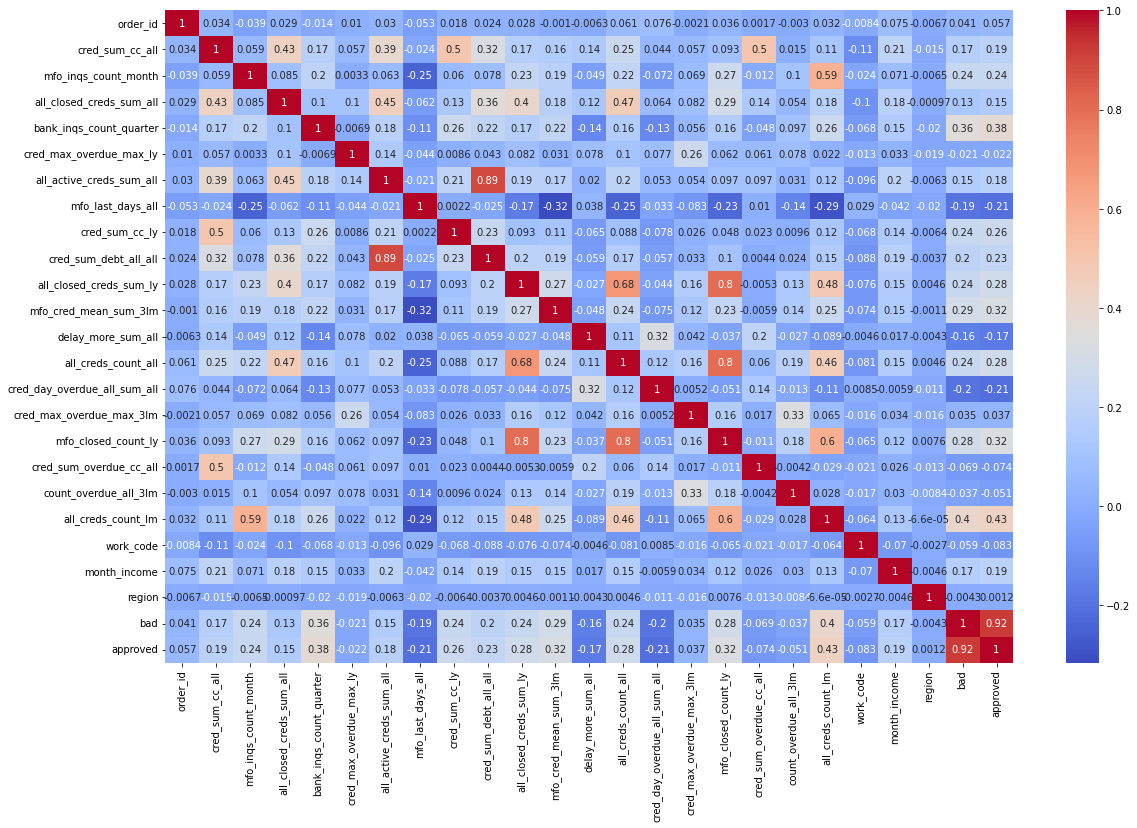

In [27]:
# Рассмотрим корреляционную матрицу.

rs = np.random.RandomState(0)
df = pd.DataFrame(credit)
corr = df.corr()
plt.figure(figsize=(19, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

1. Видно, что **2 целевые переменные** сильно коррелируют длуг с другом (что неудивительно). В следующем разделе разобьем данные на 2 датасета и каждый будем исследовать независимо от другого.

2. Также **высокая корреляция (>0.7)** наблюдается у пар:
    1. *mfo_closed_count_ly* и *all_closed_creds_sum_ly*
    2. *mfo_closed_count_ly* и *all_creds_count_all*
    3. *all_active_creds_sum_all* и *cred_sum_debt_all_all*
    
    В таких случаях обычно каждая пара рассматривается отдельно и оставляется тот признак, который лучше коррелирует с результирующим. 
    Для третьей пары по правилу удалим *all_active_creds_sum_all*
    
    В первых двух парах есть параметр *mfo_closed_count_ly*, а параметры *all_closed_creds_sum_ly* и *all_creds_count_all* коррелируют друг с другом с коэффициентом < 0.7.
    Поэтому можно рассмотреть удаление из датасета только параметра *mfo_closed_count_ly*. Но пока не будем спешить. Сначала рассмотрим все параметры. Если модель построится некачественная, вернемся к корреляционной матрице.

In [28]:
credit = credit.drop(['all_active_creds_sum_all'], axis = 1)

# Вторичная подготовка данных к анализу
#### Формирование датасета, разделение на предикторы и отклики, разделение на обучающие и тестовые выборки.

Разобьем датасет. Сформируем 2 датасета с разными  аутпутами:
1. **credit_bad** - данные с результирующим параметром *bad*
2. **credit_approved** - даные с результирующим параметром *approved*

Параметр BAD (1 - кредит просрочен, 0 - кредит возвращен, nan - отказ) исследован в данном файле. Второй - в файле credit_approved.

In [29]:
credit_bad = credit.drop(['approved'], axis=1)
credit_bad

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,...,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad
0,5498546,0,0,40364,0,0,560,0,0,0,...,529,0,0,0,0,0,3,50000,46,-1
1,5498604,150000,0,23456,0,0,9999,0,0,0,...,0,0,0,0,0,0,3,35000,17,-1
2,5498609,10,0,17999,3,0,9999,10,999900,0,...,0,0,0,0,0,2,3,35000,58,-1
3,5498645,500000,0,313247,0,0,9999,0,0,0,...,0,0,0,492397,0,0,5,35000,4,-1
4,5498647,0,0,0,1,0,9999,0,0,0,...,0,0,0,0,0,0,5,35000,34,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23111,6697173,0,0,0,3,0,733,0,0,0,...,0,0,0,0,0,0,3,35000,60,-1
23112,6697212,0,1,25400,3,950000,49,0,0,25400,...,998,950000,5,0,1,0,5,20000,7,-1
23113,6697215,100000,0,64490,2,0,414,0,0,0,...,394,0,0,0,0,0,4,35000,94,-1
23114,6697264,0,3,52080,0,700000,15,0,578365,52080,...,505,0,13,0,0,1,3,35000,46,-1


<AxesSubplot: xlabel='bad', ylabel='count'>

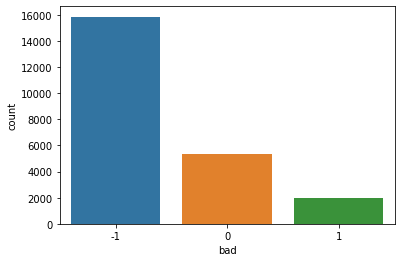

In [30]:
sns.countplot(x=credit_bad['bad'])

Разделим оба датасета на предикторы и отклики

In [31]:
credit_bad.shape

(23116, 23)

In [32]:
X = credit_bad.iloc[:, :-1].values  
y = credit_bad.iloc[:, 22].values 

In [33]:
X

array([[5498546,       0,       0, ...,       3,   50000,      46],
       [5498604,  150000,       0, ...,       3,   35000,      17],
       [5498609,      10,       0, ...,       3,   35000,      58],
       ...,
       [6697215,  100000,       0, ...,       4,   35000,      94],
       [6697264,       0,       3, ...,       3,   35000,      46],
       [6697265,       0,       0, ...,       2,   35000,      15]])

In [34]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 1234)


In [35]:
print(len(X_train), ' ', len(X_test))

15487   7629


# KNN-classifier

In [36]:
#  Проведем стандартизацию предикторов

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test) 

In [40]:
from sklearn.neighbors import KNeighborsClassifier  

#  Определяем оптимальное число ближайших соседей
#  Число ближайших соседей меняем от 1 до 15
#  Каждый раз считаем accuracy (долю правильных распознаваний)
#  error - доля ошибок при разных к

error_rate = [-1]*15  

for i in range(1, 16):  
    knn_res = KNeighborsClassifier(n_neighbors=i)
    knn_res.fit(X_train_2, y_train)
    pred_i = knn_res.predict(X_test_2)
    error_rate[i-1]= np.mean(pred_i != y_test)
    
print(np.round_(error_rate, 2))

[0.27 0.23 0.24 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22 0.22
 0.21]


Text(0, 0.5, 'Доля ошибок')

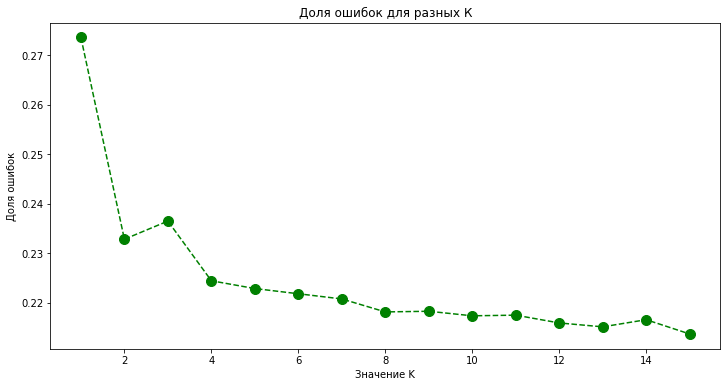

In [42]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 16), error_rate, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)

plt.title(u'Доля ошибок для разных К')  
plt.xlabel(u'Значение K')  
plt.ylabel(u'Доля ошибок')

С помощью сетки GridSearchCV посроим классификаторы с разными метриками и по accuracy выберем лучшую

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {  
      'metric': ['minkowski','euclidean', 'chebyshev', 'cosine'],
      'leaf_size': [5, 10, 20, 30]
}

knn = KNeighborsClassifier(n_neighbors=4,       
        metric='minkowski', leaf_size=10)

grid_CV = GridSearchCV(knn, param_grid=param_grid, 
                               cv=2, 
                               scoring='accuracy')

grid_CV.fit(X_train_2, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(leaf_size=10, n_neighbors=4),
             param_grid={'leaf_size': [5, 10, 20, 30],
                         'metric': ['minkowski', 'euclidean', 'chebyshev',
                                    'cosine']},
             scoring='f1_weighted')

In [86]:
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'leaf_size': 5, 'metric': 'cosine'}


In [87]:
#  Построение классификатора с лучшими параметрами
knn = grid_CV.best_estimator_

In [88]:
y_train_pred = knn.predict(X_train_2)  
y_test_pred = knn.predict(X_test_2)

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [90]:
conf_mat = confusion_matrix(y_train, y_train_pred)
conf_mat_train = pd.DataFrame(conf_mat, index=knn.classes_, columns=knn.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train, y_train_pred, normalize=True))
print(' ')
print(classification_report(y_train, y_train_pred)) 

Таблица сопряженности для обучающей выборки
       -1     0    1
-1  10194   295   70
 0   1052  2443  101
 1    465   594  273
 
Accuracy на обучающей выборке 0.833602376186479
 
              precision    recall  f1-score   support

          -1       0.87      0.97      0.92     10559
           0       0.73      0.68      0.71      3596
           1       0.61      0.20      0.31      1332

    accuracy                           0.83     15487
   macro avg       0.74      0.62      0.64     15487
weighted avg       0.82      0.83      0.81     15487



In [91]:
conf_mat = confusion_matrix(y_test, y_test_pred)
conf_mat_test = pd.DataFrame(conf_mat, index=knn.classes_, columns=knn.classes_)

print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test)  
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test, y_test_pred, normalize=True))
print(' ')
print(classification_report(y_test, y_test_pred))

Таблица сопряженности для тестовой выборки
      -1    0    1
-1  4932  313   43
 0   648  954  108
 1   271  317   43
 
Accuracy на тестовой выборке 0.7771660768121641
 
              precision    recall  f1-score   support

          -1       0.84      0.93      0.89      5288
           0       0.60      0.56      0.58      1710
           1       0.22      0.07      0.10       631

    accuracy                           0.78      7629
   macro avg       0.56      0.52      0.52      7629
weighted avg       0.74      0.78      0.75      7629



# Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
params_set = {
'max_depth': [4, 6, 7],
'min_samples_split': [8, 10, 12],
'min_samples_leaf': [4, 8, 10]
}

dtl = DecisionTreeClassifier(random_state=42,
                               max_depth=6,
                               min_samples_split=10,
                               min_samples_leaf=8)

grid_CV = GridSearchCV(estimator = dtl,
       param_grid = params_set,
       scoring = 'accuracy',
       cv = 5,
       n_jobs = -1)

grid_CV.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=8,
                                              min_samples_split=10,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 7], 'min_samples_leaf': [4, 8, 10],
                         'min_samples_split': [8, 10, 12]},
             scoring='accuracy')

In [95]:
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 8}


In [97]:
best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)  
y_pred_test = best_model.predict(X_test) 

conf_mat = confusion_matrix(y_train, y_pred_train)
conf_mat_train = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train, y_pred_train, normalize=True))
print(' ')
print(classification_report(y_train, y_pred_train)) 

conf_mat = confusion_matrix(y_test, y_pred_test)
conf_mat_test = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(' ')
print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test) 
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test, y_pred_test, normalize=True))
print(' ')
print(classification_report(y_test, y_pred_test))

Таблица сопряженности для обучающей выборки
      -1     0   1
-1  9989   569   1
 0   741  2851   4
 1   342   985   5
 
Accuracy на обучающей выборке 0.8294053076774068
 
              precision    recall  f1-score   support

          -1       0.90      0.95      0.92     10559
           0       0.65      0.79      0.71      3596
           1       0.50      0.00      0.01      1332

    accuracy                           0.83     15487
   macro avg       0.68      0.58      0.55     15487
weighted avg       0.81      0.83      0.80     15487

 
Таблица сопряженности для тестовой выборки
      -1     0   1
-1  4930   357   1
 0   409  1300   1
 1   167   464   0
 
Accuracy на тестовой выборке 0.8166207890942456
 
              precision    recall  f1-score   support

          -1       0.90      0.93      0.91      5288
           0       0.61      0.76      0.68      1710
           1       0.00      0.00      0.00       631

    accuracy                           0.82      7629
 

Деревья решений позволяют посмотреть значимость параметров

In [99]:
pd.DataFrame({'feature': credit_bad.iloc[:, :-1].columns,
              'importance': best_model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
8,cred_sum_debt_all_all,0.428092
13,cred_day_overdue_all_sum_all,0.240940
12,all_creds_count_all,0.082909
9,all_closed_creds_sum_ly,0.061599
16,cred_sum_overdue_cc_all,0.044032
7,cred_sum_cc_ly,0.032911
3,all_closed_creds_sum_all,0.023689
15,mfo_closed_count_ly,0.017999
1,cred_sum_cc_all,0.017177
11,delay_more_sum_all,0.016433


По таблице видно, что большую значимость для выходного параметра вкладывают:
1. *cred_sum_debt_all_all* - сумма задолженности по всем кредитам 
2. *cred_day_overdue_all_sum_all* - cуммарное количество дней просрочки текущих активных кредитов

И почти ничего не значат параметры:
1. *work_code* - профессия
2. *cred_max_overdue_max_3lm* - максимальная сумма просроченной задолженности, по кредитам взятым за последние 3 месяца
3. *region* - регион подачи заявки

И KNN-классификатор, и DTC плохо распознают класс "1" - кредит просрочен. Этот же класс самый малочисленный (почти в 8 раз меньше класса "1"). Что говорит о маленьком количестве данных (информации) о нем. Уберем данные о просроченном кредите.

In [102]:
credit_bad = credit_bad[credit_bad.bad != 1]

In [108]:
X = credit_bad.iloc[:, :-1].values  
y = credit_bad.iloc[:, 22].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 1234)

In [109]:
params_set = {
'max_depth': [4, 6, 7],
'min_samples_split': [8, 10, 12],
'min_samples_leaf': [4, 8, 10]
}

dtl = DecisionTreeClassifier(random_state=42,
                               max_depth=6,
                               min_samples_split=10,
                               min_samples_leaf=8)

grid_CV = GridSearchCV(estimator = dtl,
       param_grid = params_set,
       scoring = 'accuracy',
       cv = 5,
       n_jobs = -1)

grid_CV.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6, min_samples_leaf=8,
                                              min_samples_split=10,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 7], 'min_samples_leaf': [4, 8, 10],
                         'min_samples_split': [8, 10, 12]},
             scoring='accuracy')

In [110]:
best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)  
y_pred_test = best_model.predict(X_test) 

conf_mat = confusion_matrix(y_train, y_pred_train)
conf_mat_train = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train, y_pred_train, normalize=True))
print(' ')
print(classification_report(y_train, y_pred_train)) 

conf_mat = confusion_matrix(y_test, y_pred_test)
conf_mat_test = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(' ')
print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test) 
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test, y_pred_test, normalize=True))
print(' ')
print(classification_report(y_test, y_pred_test))

Таблица сопряженности для обучающей выборки
      -1     0
-1  9940   661
 0   632  2939
 
Accuracy на обучающей выборке 0.9087637595258256
 
              precision    recall  f1-score   support

          -1       0.94      0.94      0.94     10601
           0       0.82      0.82      0.82      3571

    accuracy                           0.91     14172
   macro avg       0.88      0.88      0.88     14172
weighted avg       0.91      0.91      0.91     14172

 
Таблица сопряженности для тестовой выборки
      -1     0
-1  4869   377
 0   352  1383
 
Accuracy на тестовой выборке 0.8955737000429738
 
              precision    recall  f1-score   support

          -1       0.93      0.93      0.93      5246
           0       0.79      0.80      0.79      1735

    accuracy                           0.90      6981
   macro avg       0.86      0.86      0.86      6981
weighted avg       0.90      0.90      0.90      6981



Прекрасные результаты! Давайте продолжим работать только с двумя классами и сделаем окончательный вывод о наличие недостаточного количества информации о классе "просроченные кредиты"

# Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
param_grid = {  
      'n_estimators': [30, 40, 50, 100],
      'max_depth': [4, 5, 6],
      'max_features': [1, 3, 10],
      'min_samples_split': [3, 5, 10, 15],
}

rfc = RandomForestClassifier(random_state=42,
                               n_estimators=80,
                               max_depth=5,
                               min_samples_leaf=10, 
                               min_samples_split=15)

grid_CV = GridSearchCV(rfc, param_grid=param_grid, 
                               cv=2, 
                               scoring='accuracy')

grid_CV.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=5, min_samples_leaf=10,
                                              min_samples_split=15,
                                              n_estimators=80,
                                              random_state=42),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [1, 3, 10],
                         'min_samples_split': [3, 5, 10, 15],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='accuracy')

In [114]:
best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

Лучшие значения гиперпараметров:
 {'max_depth': 6, 'max_features': 10, 'min_samples_split': 3, 'n_estimators': 50}


In [115]:
best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)  
y_pred_test = best_model.predict(X_test) 

conf_mat = confusion_matrix(y_train, y_pred_train)
conf_mat_train = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train, y_pred_train, normalize=True))
print(' ')
print(classification_report(y_train, y_pred_train)) 

conf_mat = confusion_matrix(y_test, y_pred_test)
conf_mat_test = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(' ')
print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test) 
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test, y_pred_test, normalize=True))
print(' ')
print(classification_report(y_test, y_pred_test))

Таблица сопряженности для обучающей выборки
       -1     0
-1  10076   525
 0    715  2856
 
Accuracy на обучающей выборке 0.9125035280835451
 
              precision    recall  f1-score   support

          -1       0.93      0.95      0.94     10601
           0       0.84      0.80      0.82      3571

    accuracy                           0.91     14172
   macro avg       0.89      0.88      0.88     14172
weighted avg       0.91      0.91      0.91     14172

 
Таблица сопряженности для тестовой выборки
      -1     0
-1  4965   281
 0   379  1356
 
Accuracy на тестовой выборке 0.9054576708207993
 
              precision    recall  f1-score   support

          -1       0.93      0.95      0.94      5246
           0       0.83      0.78      0.80      1735

    accuracy                           0.91      6981
   macro avg       0.88      0.86      0.87      6981
weighted avg       0.90      0.91      0.90      6981



По опыту RFC дают результат лучше, чем DTC. Что видно и в данном случае.
Значения acuracy и f1_weighted на тестовой выборке - 0.91 и 0.9 соответственно. Это очень хороший результат.

In [118]:
pd.DataFrame({'feature': credit_bad.iloc[:, :-1].columns,
              'importance': best_model.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
8,cred_sum_debt_all_all,0.251209
13,cred_day_overdue_all_sum_all,0.212492
9,all_closed_creds_sum_ly,0.118078
18,all_creds_count_lm,0.083167
15,mfo_closed_count_ly,0.059041
7,cred_sum_cc_ly,0.047517
12,all_creds_count_all,0.037559
10,mfo_cred_mean_sum_3lm,0.031818
16,cred_sum_overdue_cc_all,0.027761
6,mfo_last_days_all,0.025680


Самые значимые параметры схожи с результатами DTC. В незначимые спустились обе переменные, характеризующие клиента (*month_income, work_code*), а также параметры, не связанные ни с суммами ранее взятых кредитов, ни с количеством просроченных кредитов. Это *region* и *mfo_inqs_count_month*

# Gradient Boosting Classifier

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param_grid = {  
      'n_estimators': [400, 500, 450],
      'min_samples_leaf': [4, 5, 6],
      'max_depth': [4, 5, 6],
      'min_samples_split': [3, 5, 10, 15],
}

gbc = GradientBoostingClassifier(random_state=42,
                                   n_estimators=500,
                                   min_samples_leaf=5, 
                                   min_samples_split=10,
                                   max_depth=5,
                                   )

grid_CV = GridSearchCV(gbc, param_grid=param_grid, cv=2, 
                               scoring='accuracy')

grid_CV.fit(X_train, y_train)

best_hyperparams = grid_CV.best_params_
print('Лучшие значения гиперпараметров:\n', best_hyperparams)

In [ ]:
best_model = grid_CV.best_estimator_

y_pred_train = best_model.predict(X_train)  
y_pred_test = best_model.predict(X_test) 

conf_mat = confusion_matrix(y_train, y_pred_train)
conf_mat_train = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(u'Таблица сопряженности для обучающей выборки')
print(conf_mat_train)  
print(' ')
print('Accuracy на обучающей выборке', accuracy_score(y_train, y_pred_train, normalize=True))
print(' ')
print(classification_report(y_train, y_pred_train)) 

conf_mat = confusion_matrix(y_test, y_pred_test)
conf_mat_test = pd.DataFrame(conf_mat, index=best_model.classes_, columns=best_model.classes_)

print(' ')
print(u'Таблица сопряженности для тестовой выборки')
print(conf_mat_test) 
print(' ')
print('Accuracy на тестовой выборке', accuracy_score(y_test, y_pred_test, normalize=True))
print(' ')
print(classification_report(y_test, y_pred_test))